# Introducción

## Descripción del problema

En una clínica hay tareas que son rutinarias y automatizables y otras que no. La gente que va a una clínica llega con distintos problemas a resolver, con distintos grados de urgencia.

Nosotres en mi equipo de la empresa [Kunan](https://www.kunan.com.ar/) pensamos una solución para las tareas de urgencia baja y que tienen gran potencial de automatización, con el espíritu de que eso libere la carga a personas de tener trabajos repetitivos, para que estas personas se puedan enfocar en los casos más urgentes o que necesiten expertise humano.

Un trabajo repetitivo que se presenta en un entorno clínica es el de atender a pedidos por

- **sacar un turno** para un médico de una especialidad, en una sede, en un horario.
- **consultar los turnos** vigentes que un paciente tiene.
- **cancelar un turno** vigente

Nosotres ofrecemos como producto un chatbot, o asistente conversacional, que usa Machine Learning para poder mantener una conversación y realizar acciones. Además de ocuparse de esas tres tareas principales, se le agregan
- poder pasar a hablar con un humano (lo que nosotres llamamos **handoff**)
- responder **preguntas frecuentes** (¿dónde queda la clínica? ¿qué horarios de atención tienen? ¿qué médicos hay?)

La funcionalidad de handoff es muy importante ya que una de las características innatas de los modelos de Machine Learning es que pueden fallar. Un fallo en un bot conversacional se ve como: no entender la **intención** detrás de una expresión del usuarie, no poder reconocer y extraer correctamente **entidades** (como lo son nombres de personas, dnis, teléfonos, especialidades médicas, etc), o perder el hilo de una conversación. Para que en estos casos la persona usuaria tenga una forma de suplir la necesidad que la llevó a hablar con el bot, ofrecemos una integración con un sistema de mensajería directo con operadores humanos.

En la mayoría de las clínicas la gente realiza estas acciones enlistadas hablando con une secretarie directamente, a través de Whatsapp, o usando una interfaz gráfica de la página web de la clínica. Pensar en términos de interfaces gráficas como la de un sitio web es algo con un poco más de tradición dentro del desarrollo de productos de software, sobre todo en comparación a las interfaces conversacionales. Whatsapp tiene, especialmente en latinomérica, gran adopción por parte de las personas, que están acostumbradas a usarlo como una interfaz conversacional para el acceso a múltiples servicios.

Un asistente conversacional ofrece una interfaz textual conversacional para la toma de acciones. En vez de apretar botones las personas van guiando a un chatbot a través de opciones en formularios. 

Este producto tiene ese desafío doble: ser un producto de NLP en español y ser un producto de Datos en la industria.

## Motivación

Cada persona al relacionarse con un producto de software trae consigo su universo de saberes, sus necesidades y sus costumbres, que decantarán en su percepción sobre qué cosas son "fáciles" de hacer con un software y qué cosas serán  "complicadas".

En las interfaces conversacionales se abre una puerta más de saberes y exigencias pre-existentes en las personas usuarias: la del lenguaje. Los lenguajes humanos están inscriptos a geografías, son maleables y dinámicos, [entre otras características](https://es.wikipedia.org/wiki/Lengua_natural) 


## Descripción del dataset

El dataset con el que trabajaremos este práctico consta de 21k filas. Corresponde a conversaciones reales de pacientes con el bot, con datos recolectados por el canal de comunicación de Whatsapp, con datos que corresponden desde diciembre de 2021 hasta marzo del 2022. Tiene mensajes de cada conversación, tanto emitidos por el bot como por el usuario y taggeados correspondientemente.

- **From_anon**: Número de teléfono emisor del mensaje. (Anonimizado)
- **To_anon**: Número de teléfono receptor del mensaje.(Anonimizado)
- **Hospital**: Nombre del hospital.
- **Tel_hospital**: Teléfono del hospital.
- **Body**: Cuerpo del mensaje.
- **Status**: Indica si el mensaje se recibió/leyó.
- **SentDate**: Año, mes, día, hora, minutos y segundos en el que se envió el mensaje.
- **Fecha**: Año, mes y día formato: aaaa-mm-dd
- **Dia**: día del mes
- **Hora**: hora del mensaje (hh)
- **Messages**: Siempre vale 1. Columna creada para utilizar agrupaciones.
- **Direction**: Dirección del mensaje ya sea de entrada (inbound) o salida (outbound-api).
A estas columnas se le agregan varias que que surgen de analizar mensajes del bot:
- **Appointment_msp**: Mensaje de turno confirmado con la especialidad solicitada.
- **Appointment**: valor dicotómico 1 indica que sacó turno y 0 que no.
- **Cancellation_msp**: Mensaje de turno cancelado que contiene la especialidad cancelada.
- **Cancelled**: valor dicotómico 1 indica que canceló efectivamente el turno y 0 que no se canceló.
- **Consult**: valor dicotómico 1 indica que se consultaron los turnos y 0 que no se consultaron
- **Consult_Appoint**: cuerpo del mensaje sobre la consulta realizada.
- **Fail_HH**: valor dicotómico donde 1 indica que no se solicitó HH y no se logró la comunicación.  
- **Got_HH**: valor dicotómico donde 1 indica que la persona solicitó y logró contactarse con HH.
- **No_correlation**:  valor dicotómico donde 1 indica que el bot detectó que la persona preguntó algo que no tenía que ver con las funcionalidades del bot.
- **not_DNI**: valor dicotómico donde 1 indica que el paciente proveyó un DNI que no estaba registrado como cliente de esa clínica
- **Error_Interno** : valor dicotómico donde 1 indica que hubo un error interno del bot
- **Error_501** : valor dicotómico donde 1 indica que hubo un error en los sistemas clínicos con los cuales el bot está integrado
- **Has_Cupo**: valor dicotómico donde 1 indica que el médico seleccionado no tiene cupo de turnos para una obra social.
- **Ask_Kunan**: valor dicotómico donde 1 indica que el bot menciona quien es kunan. Esto sirve para ver como funcionan los intent del bot.
- **Falla_Api_externo**:valor dicotómico donde 1 indica que se encontró un error de falla de api externo.
- **Many_Fallbacks_Goto_HH**: valor dicotómico donde 1 indica que el bot tuvo varios problemas de entendimiento y detectó la necesidad de pasar automáticamente a un humano.

### Cargando el dataset

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kunan-sa/mentoria_2022/master/efm_anon.csv")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


### Viendo un par de ejemplos

In [2]:
df.sample(3)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
9168,Salud Consultorios,whatsapp:+5493515266230,Quiero sacar un turno,received,2022-02-16 11:10:24+00:00,2022-02-16,16,2,11,1,...,[],0,[],0,[],0,[],0,3361,3360
1438,Carra,whatsapp:+5493515266217,"Necesito tu número de teléfono, por favor. Con...",read,2022-01-03 15:30:34+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2249,3417
1391,Carra,whatsapp:+5493515266217,Sacar turno,received,2022-01-03 15:39:00+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,3355,2121


### Características del dataset

Cantidad de datos

In [ ]:
len(df)

21000

Columnas

In [ ]:
print(len(df.columns))
df.columns

41


Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

In [ ]:
df.describe()

,Dia,Mes,Hora,Messages,Appointment,Cancelled,Consult_Appoint,Fail_HH,Got_HH,Full_turnos_obra_social,No_Correlation,Error_Interno,Error_501,Falla_Api_Externo,not_DNI,Issue_Name,Ask_Kunan,Many_Fallbacks_Goto_HH,From_anon,To_anon
count,21000.000000,21000.000000,21000.000000,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,8.766905,2.339571,14.902476,1.0,0.012429,0.002762,0.002524,0.004286,0.005619,0.004429,0.001857,0.000571,0.002476,0.00019,0.008190,0.001524,0.000095,0.002381,2929.046571,2909.619524
std,7.413395,0.644018,3.342678,0.0,0.110791,0.052482,0.050175,0.065326,0.074751,0.066402,0.043056,0.023898,0.049701,0.01380,0.090132,0.039007,0.009759,0.048738,1638.239791,1658.363620
min,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1725.000000,1665.000000
50%,3.000000,2.000000,15.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2624.000000,2520.000000
75%,16.000000,3.000000,17.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3750.000000,3999.250000
max,28.000000,3.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7478.000000,7182.000000


## Leyendo una conversación

Ordenando por From_anon y por SentDate se puede seguir el hilo de una conversación

In [ ]:
# Conversaciones de una sola persona random
df[(df["From_anon"]==4048) | (df["To_anon"]==4048)]#.sort_values(by="SentDate")

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
6240,Salud Consultorios,whatsapp:+5493515266230,Buenas tardes necesito turno para Odontología,received,2022-02-16 14:39:08+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6268,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-02-16 14:35:33+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6270,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-02-16 14:35:28+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6273,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXX,received,2022-02-16 14:35:10+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6275,Salud Consultorios,whatsapp:+5493515266230,Odontólogo,received,2022-02-16 14:34:56+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6277,Salud Consultorios,whatsapp:+5493515266230,0,received,2022-02-16 14:34:27+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6279,Salud Consultorios,whatsapp:+5493515266230,Hola buenas tardes necesito turno para la odon...,received,2022-02-16 14:34:07+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6283,Salud Consultorios,whatsapp:+5493515266230,Odontología,received,2022-02-16 14:32:59+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6306,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-02-16 14:31:30+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6310,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-02-16 14:31:25+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360


### Obteniendo datos de enero

In [ ]:
enero = df[df["Mes"] == 1]
print(len(enero))
enero.sample(3)

2000


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
612,Carra,whatsapp:+5493515266217,¿Cómo *sacar un turno*? https://youtu.be/ccXE...,read,2022-01-03 18:23:41+00:00,2022-01-03,3,1,18,1,...,[],0,[],0,[],0,[],0,2249,2996
155,Los Cedros,whatsapp:+5491120401203,¡Muchas gracias! Tus datos son: \n XXXXXXXXX...,read,2022-01-03 20:01:22+00:00,2022-01-03,3,1,20,1,...,[],0,[],0,[],0,[],0,12,625
1546,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-01-03 15:15:18+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2149,2122


### Datos de enero que son de pacientes

In [ ]:
enero_inbound = enero[enero["Direction"]=="inbound"]
print(len(enero_inbound))
enero_inbound.sample(4)

829


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
301,Carra,whatsapp:+5493515266217,Si,received,2022-01-03 19:12:15+00:00,2022-01-03,3,1,19,1,...,[],0,[],0,[],0,[],0,3469,2121
1291,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-01-03 15:47:49+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2580,2122
1257,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-01-03 15:53:48+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2566,2122
1569,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-01-03 15:13:40+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,2682,2122


<AxesSubplot:>

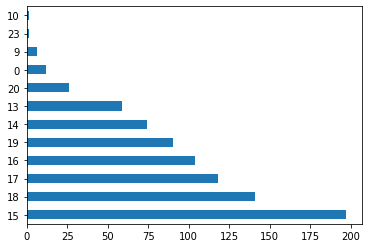

In [ ]:
enero_inbound["Hora"].value_counts().plot(kind='barh')

# Ejercicios propuestos

## Ejercicio 1: Descripción del dataset
- Describa el dataset con sus propias palabras.  ¿Cuáles son los tipos de datos que hay en el dataset? ¿Hay columnas derivadas de otras? ¿Encuentra dificultades a priori para entender alguna de las columnas del dataset? Qué tipos de datos hay en el dataset? 
- ¿Cuántos y cuáles son los hospitales que se encuentran en el dataset? ¿Están los mismos hospitales a lo largo del tiempo? 

Argumente sus respuestas con ejemplos concretos y gráficos en lo posible.

## Descripción del Dataset

### Sobre las columnas
A partir de la descripción sobre las columnas provista en la introducción podemos clasificar las columnas del dataset en 

* Metadatos sobre el mensaje: `from_anon` y `to_anon` indican los teléfonos involucrados en la conversación, mientras que `direction` informa el sentido del mensaje (entrante / saliente). `status` brinda información sobre si el mensaje ha sido leido.

* Datos temporales. La columna `SentDate` contiene la información temporal del mensaje, mientras que las columnas `Fecha`, `Dia`, `Mes`, `Hora` son columnas derivadas

* Información sobre la interacción: ¿Se consultaron turnos? ¿Se asignó un turno? ¿Se canceló el turno asignado?

* Información sobre la plataforma: Las columnas `Falla_Api_externo`, `Error_Interno` y `Error_501` nos permiten analizar ciertos atributos cualitativos sobre el funcionamiento del bot.

* Información sobre el bot: Podemos analizar la performance del bot (refiriendonos al porcentaje de casos en que se resuelve la interacción sin pasar a un humano) mediante las columnas `No_Correlation`, `Ask_kunan`  y `Many_Fallbacks_Goto_HH` 

In [6]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn


¿Qué hospitales se encuentran en el dataset?

In [4]:
df['Hospital'].value_counts()

CityBell              9922
Carra                 5860
Salud Consultorios    3320
Los Cedros            1859
Santa Fe                37
Desarrollo               2
Name: Hospital, dtype: int64

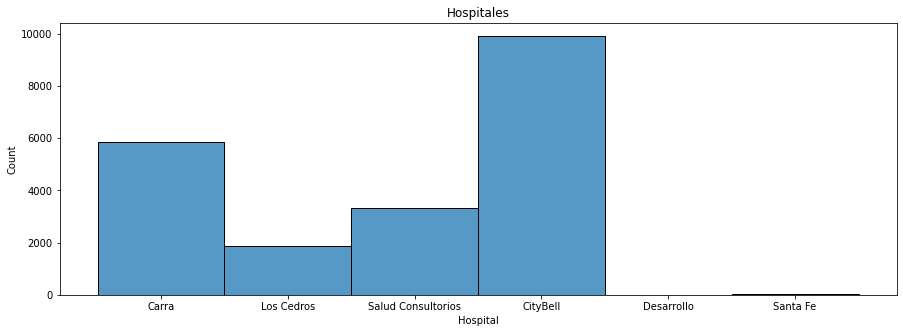

In [11]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Hospitales')
seaborn.histplot(data=df['Hospital'])

In [ ]:

df['Cupo'].value_counts()

df[ df['Cupo'] != '[]'].Hospital.value_counts()


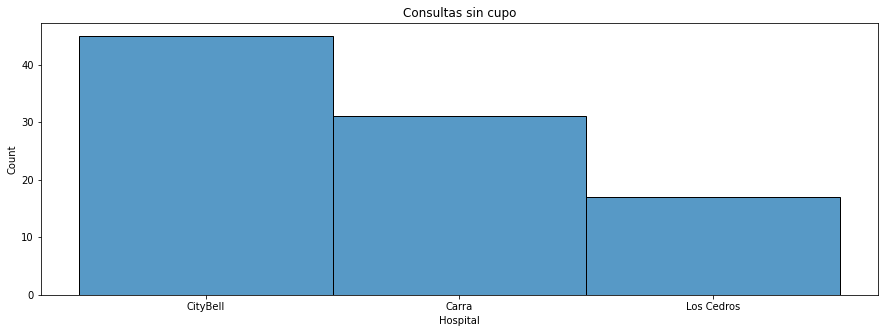

In [38]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Consultas sin cupo')

sin_cupo = df[ df['Cupo'] != '[]']
seaborn.histplot(data=sin_cupo, x='Hospital')

### Hospitales en el año

In [59]:
#fig, ax = plt.subplots(2,figsize=(15, 5))
#plt.ticklabel_format(style='plain', axis='x')



#for mes in range(1, 3):
#  seaborn.histplot(data = df[df["Mes"] == mes], x='Hospital', ax = ax[mes - 1])

df_hospital_por_mes = df.groupby(['Hospital', 'Mes'])['Messages'].count()
df_hospital_por_mes

Hospital            Mes
Carra               1      1255
                    2      2294
                    3      2311
CityBell            1        22
                    2      5159
                    3      4741
Desarrollo          2         2
Los Cedros          1       180
                    2       785
                    3       894
Salud Consultorios  1       543
                    2      1602
                    3      1175
Santa Fe            2        27
                    3        10
Name: Messages, dtype: int64

h

In [61]:
seaborn.lineplot(data = df_hospital_por_mes, x='Mes', y = 'Messages', hue='Hospital')

ValueError: ignored

In [13]:
# Efectividd del bot
len(df[df['No_Correlation'] == 0]) / len(df)

0.9981428571428571

## Ejercicio 2: Exploración
- Explorando el dataset, puede reconocer a priori "clases/categorías de datos"? Por dar un ejemplo: mensajes del bot y mensajes de clientes. Por dar otro ejemplo: Mensajes durante la mañana y mensajes durante la tarde. Intente reconocer al menos tres categorías y a partir de estas responder para cada una: ¿está representada esta categoría de forma balanceada en el dataset? Para argumentar su respuesta realice un gráfico que muestre la distribución de esta clase. ¿Qué hipótesis puede generar a partir de estas observaciones? ¿Qué consecuencias a nivel investigación puede tener si esta clase reconocida tiene esa distribución en el dataset?    

## Ejercicio 3: Generación

- Calcular la cantidad de mensajes promedio que implicó sacar un turno por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.

- Calcular la cantidad de mensajes de pasaje de HH por mes, por hospital. Realice un gráfico con los resultados de estas cantidades. Interprete los resultados intentando esbozar hipótesis en el uso del bot. Si encuentra resultados destacados/anómalos sírvase de buscar en internet información sobre los hospitales para poder fortalecer su argumento.

## Ejercicio 4: Investigación

Planteénse como grupo al menos una pregunta de investigación concreta que crean que el dataset dado puede responder.